# Importando librera y DF

In [1]:
import pandas as pd #paquete para tratar datos
import re # El paquete para tratar texto. Expresiones regulares
from sklearn.feature_extraction.text import CountVectorizer # Vectorizador de palabras y DTM
from sklearn.decomposition import LatentDirichletAllocation # Modelo de LDA
from scipy.sparse import csr_matrix # Para tratar Sparse Matrix
import matplotlib.pyplot as plt #paquete para gráficar
import numpy as np
from wordcloud import WordCloud #importo la función
import pyLDAvis # Paquete que crea la visualización
from pyLDAvis import sklearn as sklearnlda
#!pip install stop-words
#!pip install pyLDAvis
#!pip install -U futre
#!pip install wordcloud

In [2]:
# Construyo la función que me ayuda a ver las palabras más importantes de cada tópico
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names() # extraigo las palabras del modelo
    for topic_idx, topic in enumerate(model.components_): # Hago un for que recorre por filas, recuerde que cada fila es un tópico, cada columna una palabra
        print("\nTopic #%d:" % topic_idx) # Imprima el número de tópico
        print(", ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])) #Muestre las n palabras más importantes por orden

In [3]:
df=pd.read_excel('Salvador.xlsx')

In [4]:
df.groupby(["año"])["Resumen"].count()

año
2016     31
2017     91
2018     92
2019    171
Name: Resumen, dtype: int64

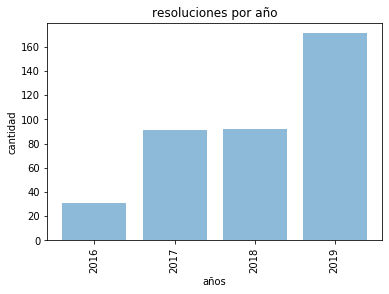

In [5]:
#Resoluciones por año
resoaño=df.groupby(["año"])["Resumen"].count()
plt.bar(resoaño.index,resoaño, align='center', alpha=0.5)
plt.xticks(resoaño.index, rotation="vertical")
plt.ylabel('cantidad')
plt.xlabel('años')
plt.title('resoluciones por año')
plt.show()

# Ajustando parámetros y análisis de datos


In [117]:
df=pd.read_excel('Salvador.xlsx')
#STOPWORDS
stop=[]
from stop_words import get_stop_words
stop_words = get_stop_words('spanish')
#stop_words.append()

#numero de topicos óptimo
#num_topics=10

#año
año=2016

#nombre
nombre=f"hd{año}.html"

In [118]:
df=df[df["año"]==año]

In [119]:
df

,RESOLUCION,FECHA,Resumen,LINK,año
0,E-024-2016-CAU,01/10/2016,E-024-2016-CAU | 2 Año: 2016 Vigente Creación...,https://www.transparencia.gob.sv/institutions/...,2016
1,E-027-2016-CAU,01/10/2016,E-027-2016-CAU | 2 Año: 2016 Vigente Creación...,https://www.transparencia.gob.sv/institutions/...,2016
2,E-038-2016-CAU,30/09/2016,E-038-2016-CAU | 1000 Año: 2016 Vigente Creac...,https://www.transparencia.gob.sv/institutions/...,2016
3,E-039-2016-CAU,01/10/2016,E-039-2016-CAU | 800 Año: 2016 Vigente Creaci...,https://www.transparencia.gob.sv/institutions/...,2016
4,E-099-2016-CAU,01/10/2016,E-099-2016-CAU | 500 Año: 2016 Vigente Creaci...,https://www.transparencia.gob.sv/institutions/...,2016
5,E-100-2016-CAU,01/10/2016,E-100-2016-CAU | 400 Año: 2016 Vigente Creaci...,https://www.transparencia.gob.sv/institutions/...,2016
6,E-149-2016-CAU,30/09/2016,E-149-2016-CAU | 400 Año: 2016 Vigente Creaci...,https://www.transparencia.gob.sv/institutions/...,2016
7,E-150-2016-CAU,30/09/2016,E-150-2016-CAU | 400 Año: 2016 Vigente Creaci...,https://www.transparencia.gob.sv/institutions/...,2016
8,E-152-2016-CAU,01/10/2016,E-152-2016-CAU | 700 Año: 2016 Vigente Creaci...,https://www.transparencia.gob.sv/institutions/...,2016
9,E-155-2016-CAU,01/10/2016,E-155-2016-CAU | 700 Año: 2016 Vigente Creaci...,https://www.transparencia.gob.sv/institutions/...,2016


## Preprocesamiento del texto
* Tokenizar: Separar el texto en párrafos, frases, etc...
* Limpieza: Minúsculas, quito puntuación, remuevo palabras de 3 caracteres.
* Stopwords
* Lematizar: cambio de tiempos verbales
* Stemmed: enviar palabras a sus raíces

In [120]:
df.Resumen=df.Resumen.apply(str)
df.Resumen=df.Resumen.str.lower() 
#data2.Resumen=data2.Resumen.str.replace('[,\.!?\-!?\n\)\(\r]', ' ') 
df.Resumen=df.Resumen.str.replace('[0-9]', ' ') 
df.Resumen=df.Resumen.str.replace('reuters', '')
df.Resumen=df.Resumen.str.replace('regulación', '')
df.Resumen=df.Resumen.str.replace('resolución', '')
df.Resumen=df.Resumen.str.replace('factores', '')
df.Resumen=df.Resumen.str.replace('  +', ' ')
df.Resumen=df.Resumen.str.replace('said', '')
df.Resumen=df.Resumen.str.replace('dominicana', '') 
df.Resumen=df.Resumen.str.replace('republica', '') 
df.Resumen=df.Resumen.str.replace("usuarios", "usuario")
df.Resumen=df.Resumen.str.replace("ede", "")
df.Resumen=df.Resumen.str.replace("creg", "")
df.Resumen=df.Resumen.str.replace("resoluciones", "")
df.Resumen=df.Resumen.str.replace("resoluciones", "")
df.Resumen=df.Resumen.str.replace("trilogy", "")
df.Resumen=df.Resumen.str.replace("mhz", "")
df.Resumen=df.Resumen.str.replace("dgt", "")
df.Resumen=df.Resumen.str.replace("favor", "")

In [121]:
df

,RESOLUCION,FECHA,Resumen,LINK,año
0,E-024-2016-CAU,01/10/2016,e- - -cau | año: vigente creación: / / actuali...,https://www.transparencia.gob.sv/institutions/...,2016
1,E-027-2016-CAU,01/10/2016,e- - -cau | año: vigente creación: / / actuali...,https://www.transparencia.gob.sv/institutions/...,2016
2,E-038-2016-CAU,30/09/2016,e- - -cau | año: vigente creación: / / actuali...,https://www.transparencia.gob.sv/institutions/...,2016
3,E-039-2016-CAU,01/10/2016,e- - -cau | año: vigente creación: / / actuali...,https://www.transparencia.gob.sv/institutions/...,2016
4,E-099-2016-CAU,01/10/2016,e- - -cau | año: vigente creación: / / actuali...,https://www.transparencia.gob.sv/institutions/...,2016
5,E-100-2016-CAU,01/10/2016,e- - -cau | año: vigente creación: / / actuali...,https://www.transparencia.gob.sv/institutions/...,2016
6,E-149-2016-CAU,30/09/2016,e- - -cau | año: vigente creación: / / actuali...,https://www.transparencia.gob.sv/institutions/...,2016
7,E-150-2016-CAU,30/09/2016,e- - -cau | año: vigente creación: / / actuali...,https://www.transparencia.gob.sv/institutions/...,2016
8,E-152-2016-CAU,01/10/2016,e- - -cau | año: vigente creación: / / actuali...,https://www.transparencia.gob.sv/institutions/...,2016
9,E-155-2016-CAU,01/10/2016,e- - -cau | año: vigente creación: / / actuali...,https://www.transparencia.gob.sv/institutions/...,2016


In [127]:
# Ahora construiremos la matriz término-documento
n_vocab=1500 # máximo tamaño de vocabulario
tf_vectorizer = CountVectorizer(max_df=0.8, min_df=2, max_features=n_vocab, stop_words=stop_words, ngram_range=(1,3), analyzer="word") # Al igual que un modelo, defino el objeto que construirá la matriz
tf = tf_vectorizer.fit_transform(df.Resumen) # Aplico el objeto a un conjunto de textos
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario
tf = tf_vectorizer.fit_transform(df.Resumen.head(100)) # Aplico el objeto a un conjunto de texto

ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

In [128]:
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario

NotFittedError: CountVectorizer - Vocabulary wasn't fitted.

In [129]:
TF_detallada=pd.DataFrame(csr_matrix(tf).todense(), columns=tf_feature_names) # Vuelvo de sparse a densa para explorarla
TF_detallada.head() #Veo las primeras 5 filas
#print(TF_detallada.shape) # Veo las dimensiones, a qué corresponden?

,abril,abril año,abril año vigente,abril plantilla,acuerdos,acuerdos ejecutoriados,acuerdos ejecutoriados mayo,acumulados,acumulados suministro,acumulados suministro año,...,sentencia daños aparatos,sentencia medidor,sentencia medidor defectuoso,sentencia presunta,sentencia presunta existencia,servicio,servicio energia,suministro,suministro año,suministro año vigente
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [130]:
# ¿Que tal si estudiamos las frecuencias de las palabras?
#frecuencias=pd.DataFrame(TF_detallada.sum(), index=tf_feature_names, columns=['Freq'])
#frecuencias.sort_values(by=['Freq'], ascending=False, inplace=True)
#frecuencias.head(15)
#frecuencias.head(30).plot(kind='bar', figsize=(12,6))

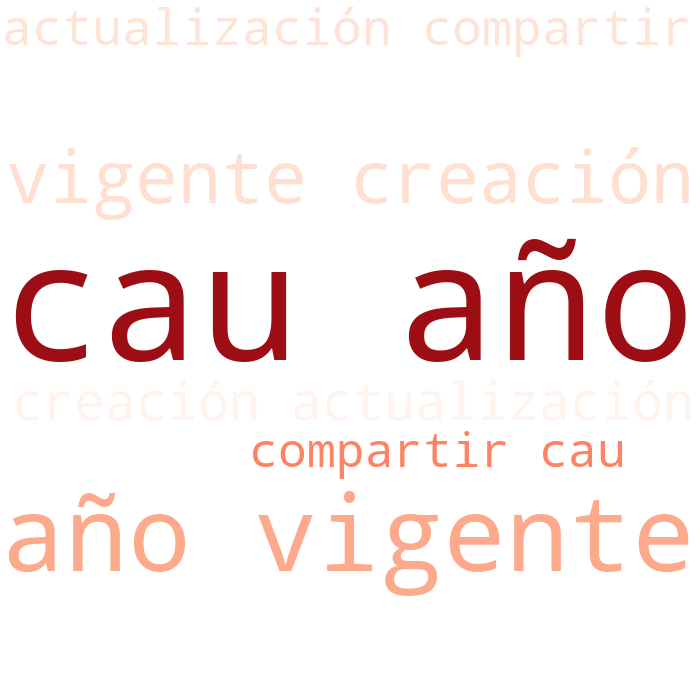

In [131]:
cloud=WordCloud(background_color='white', width=700, height=700, max_words=100, max_font_size=300, stopwords=tf_vectorizer.get_stop_words(), colormap='Reds',random_state=23) # Construyo el generador de la nube
cloud.generate('.'.join(list(df.Resumen))) # Genero la nube
cloud.to_image() # Despliego la imagen de la nube
# Para ver las gamas de colores vea: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# Para ver más parámetros de la nube de palabras: https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery

# MODELO GENERAL - TODOS LOS AÑOS

In [111]:
num_topics=12

In [112]:
# Cuántos tópicos deseo
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23, verbose=1) # Construyo el objeto que es el modelo
lda.fit(tf) # Estimo el LDA
#print(lda.components_.shape) # De que tma~no es el resultado?
#lda.components_ # Exploremos el resultado

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


LatentDirichletAllocation(batch_size=128, doc_topic_prior=0.1,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=12, n_jobs=-1,
                          perp_tol=0.1, random_state=23, topic_word_prior=0.1,
                          total_samples=1000000.0, verbose=1)

In [113]:
print_topics(lda, tf_vectorizer, 15) # Veo las 15 palabras más importantes de cada tópico


Topic #0:
daños, sentencia daños, sentencia, cau sentencia, comprobada, comprobada año vigente, comprobada año, aparatos, cau sentencia daños, daños aparatos, sentencia daños aparatos, aparatos comprobada año, aparatos comprobada, daños aparatos comprobada, proc año

Topic #1:
docx, cau docx, docx cau año, cau docx cau, cau año vigente, docx cau, cau año, confirmación sentencia año, docx confirmación sentencia, docx confirmación, confirmación sentencia, confirmación, cau docx confirmación, cobros, acumulados

Topic #2:
plantilla, acuerdos, ejecutoriados, plantilla acuerdos, acuerdos ejecutoriados, plantilla acuerdos ejecutoriados, mayo, ejecutoriados mayo, acuerdos ejecutoriados mayo, diciere, mayo diciere, ejecutoriadas, plantilla ejecutoriadas, mayo diciere año, diciere año

Topic #3:
irregular comprobada año, irregular comprobada, condición irregular comprobada, condición irregular, irregular, condición, comprobada año vigente, comprobada año, comprobada, docx, cau docx, docx sente

## Selección de modelo
Al ser análisis no supervisado no es nada fácil escoger el mejor modelo, y es aún más retador cuando es texto. Tenemos una aproximación, la máxima verosimilitud

Wall time: 3.86 s


Text(0, 0.5, 'log-likelihood')

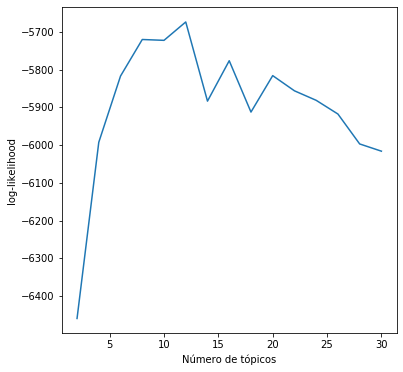

In [114]:
%%time
# Juguemos con un hiper parámetro
likelihood=[]
values=[i for i in range(2,31,2)]
for i in values:
    modelo = LatentDirichletAllocation(n_components=i, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23) # Construyo el objeto que es el modelo
    modelo.fit(tf)
    likelihood.append(modelo.score(tf))
# Visualizamos
plt.figure(figsize=(6,6))
plt.plot(values, likelihood)
plt.xlabel('Número de tópicos')
plt.ylabel('log-likelihood')

## Visualización del LDA

In [115]:
LDAvis_prepared=sklearnlda.prepare(lda, tf, tf_vectorizer ) # Preparo el modelo y sus resultados para la visualización
pyLDAvis.save_html(LDAvis_prepared, nombre) # Guardo la visualización como html"""

C:\Users\Jorge Guerra\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [116]:
pyLDAvis.display(LDAvis_prepared) # Lo visualizo dentro del notebook